# Data Analysis

### Imports

In [1]:
from torchvision.datasets import MNIST
import numpy as np
import pandas as pd
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### Get MNIST Dataset

In [2]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

train_dataset = MNIST(root='./data', train=True, download=True, transform=transforms)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transforms)

# Convert the datasets to pandas DataFrames
def dataset_to_dataframe(dataset):
    data = []
    for i in range(len(dataset)):
        img, label = dataset[i]
        data.append((img.view(-1).numpy(), label))

    df = pd.DataFrame(data, columns=['image', 'label'])
    return df

train_df = dataset_to_dataframe(train_dataset)
test_df = dataset_to_dataframe(test_dataset)

### Dataset Distribution Analysis

In [3]:
train_class_counts = train_df['label'].value_counts()
test_class_counts = test_df['label'].value_counts()

print("Training Data Class Counts:")
print(train_class_counts.sort_values())

print("\nTest Data Class Counts:")
print(test_class_counts.sort_values())

Training Data Class Counts:
label
5    5421
4    5842
8    5851
6    5918
0    5923
9    5949
2    5958
3    6131
7    6265
1    6742
Name: count, dtype: int64

Test Data Class Counts:
label
5     892
6     958
8     974
0     980
4     982
9    1009
3    1010
7    1028
2    1032
1    1135
Name: count, dtype: int64


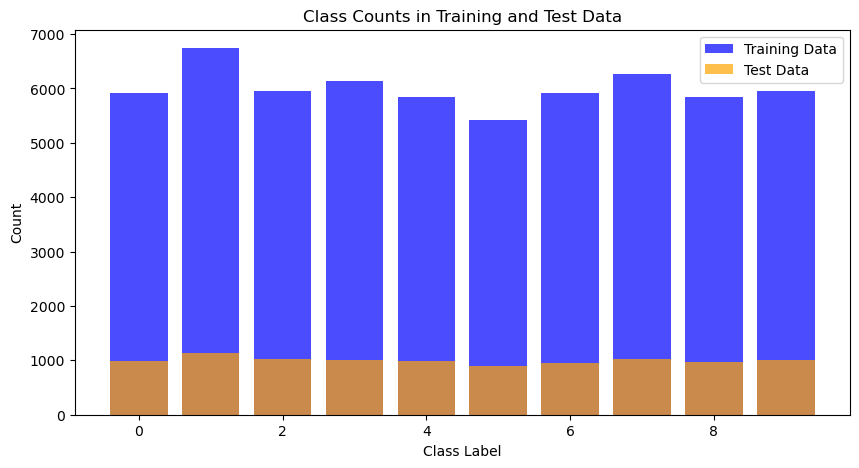

In [4]:
train_class_counts_sorted = train_class_counts.sort_index()
test_class_counts_sorted = test_class_counts.sort_index()

plt.figure(figsize=(10, 5))
plt.bar(train_class_counts_sorted.index, train_class_counts_sorted, color='blue', alpha=0.7, label='Training Data')

plt.bar(test_class_counts_sorted.index, test_class_counts_sorted, color='orange', alpha=0.7, label='Test Data')

plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Counts in Training and Test Data')
plt.legend()
plt.show()

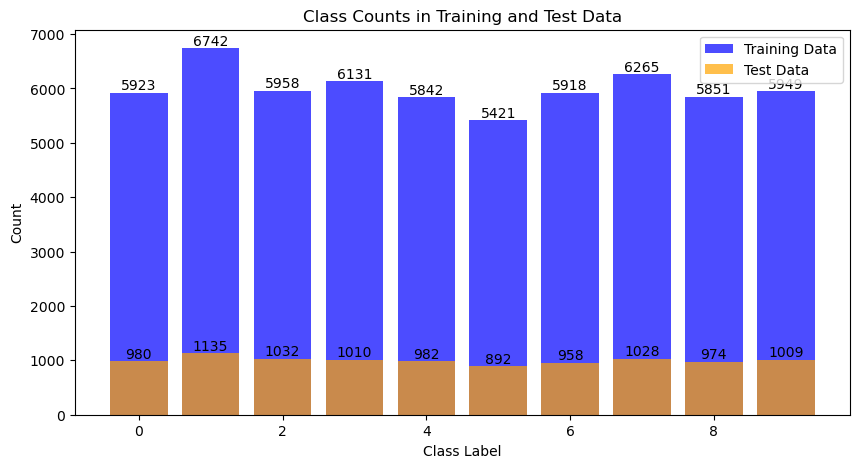

In [7]:
train_class_counts_sorted = train_class_counts.sort_index()
test_class_counts_sorted = test_class_counts.sort_index()

plt.figure(figsize=(10, 5))
bars_train = plt.bar(train_class_counts_sorted.index, train_class_counts_sorted, color='blue', alpha=0.7, label='Training Data')

for bar in bars_train:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# plt.bar(test_class_counts_sorted.index, test_class_counts_sorted, color='orange', alpha=0.7, label='Test Data')

bars_test = plt.bar(test_class_counts_sorted.index, test_class_counts_sorted, color='orange', alpha=0.7, label='Test Data')
for bar in bars_test:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Counts in Training and Test Data')
plt.legend()
plt.show()

### Trim Training Dataset to Even Distribution

In [5]:
instances_per_class = 5000

trimmed_train_df = train_df.groupby('label').apply(lambda x: x.sample(instances_per_class)).reset_index(drop=True)

# print(trimmed_train_df)

trimmed_train_class_counts = trimmed_train_df['label'].value_counts()

print("Training Data Class Counts:")
print(trimmed_train_class_counts.sort_values())

Training Data Class Counts:
label
0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
Name: count, dtype: int64
